In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [101]:
historico = pd.read_csv('datasets-2412-4042-LaLiga_dataset.csv')
asistenciaAway14_15 = pd.read_csv('17825-960796-bundle-archive/Away attendance 2014-15.csv')
asistenciaAway15_16 = pd.read_csv('17825-960796-bundle-archive/Away attendance 2015-16.csv')
asistenciaAway16_17 = pd.read_csv('17825-960796-bundle-archive/Away attendance 2016-17.csv')

asistenciaHome14_15 = pd.read_csv('17825-960796-bundle-archive/Home attendance 2014-15.csv')
asistenciaHome15_16 = pd.read_csv('17825-960796-bundle-archive/Home attendance 2015-16.csv')
asistenciaHome16_17 = pd.read_csv('17825-960796-bundle-archive/Home attendance 2016-17.csv')










In [102]:
asistenciaAway14_15 = asistenciaAway14_15[(asistenciaAway14_15['Team'] == 'Barcelona') | (asistenciaAway14_15['Team'] == 'Real Madrid')|(asistenciaAway14_15['Team'] == 'Atletico Madrid')|(asistenciaAway14_15['Team'] == 'Valencia')|(asistenciaAway14_15['Team'] == 'Athletic Bilbao')]
asistenciaAway15_16 = asistenciaAway15_16[(asistenciaAway15_16['Team'] == 'Barcelona') | (asistenciaAway15_16['Team'] == 'Real Madrid')|(asistenciaAway15_16['Team'] == 'Atletico Madrid')|(asistenciaAway15_16['Team'] == 'Valencia')|(asistenciaAway15_16['Team'] == 'Athletic Bilbao')]
asistenciaAway16_17 = asistenciaAway16_17[(asistenciaAway16_17['Team'] == 'Barcelona') | (asistenciaAway16_17['Team'] == 'Real Madrid')|(asistenciaAway16_17['Team'] == 'Atletico Madrid')|(asistenciaAway16_17['Team'] == 'Valencia')|(asistenciaAway16_17['Team'] == 'Athletic Bilbao')]

asistenciaHome14_15 = asistenciaHome14_15[(asistenciaHome14_15['Team'] == 'Barcelona') | (asistenciaHome14_15['Team'] == 'Real Madrid')|(asistenciaHome14_15['Team'] == 'Atletico Madrid')|(asistenciaHome14_15['Team'] == 'Valencia')|(asistenciaHome14_15['Team'] == 'Athletic Bilbao')]
asistenciaHome15_16 = asistenciaHome15_16[(asistenciaHome15_16['Team'] == 'Barcelona') | (asistenciaHome15_16['Team'] == 'Real Madrid')|(asistenciaHome15_16['Team'] == 'Atletico Madrid')|(asistenciaHome15_16['Team'] == 'Valencia')|(asistenciaHome15_16['Team'] == 'Athletic Bilbao')]
asistenciaHome16_17 = asistenciaHome16_17[(asistenciaHome16_17['Team'] == 'Barcelona') | (asistenciaHome16_17['Team'] == 'Real Madrid')|(asistenciaHome16_17['Team'] == 'Atletico Madrid')|(asistenciaHome16_17['Team'] == 'Valencia')|(asistenciaHome16_17['Team'] == 'Athletic Bilbao')]




In [103]:

historico.head()

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
0,1970-71,Real Zaragoza,3,0,5,13,3,18,9,30,18,14,8,22,54,-32
1,1970-71,Elche,4,0,5,11,4,16,10,30,22,17,8,25,46,-21
2,1970-71,Las Palmas,5,0,3,12,5,15,10,30,25,25,8,33,42,-9
3,1970-71,Sabadell,8,0,3,14,8,17,5,30,29,19,9,28,49,-21
4,1970-71,Espanyol,7,1,4,9,8,13,9,30,33,13,5,18,25,-7


In [104]:
historico = historico[(historico['season'] == '2014-15') | (historico['season'] == '2015-16')| (historico['season'] == '2016-17')]


In [105]:
asistenciaAway14_15.head()

,League,Team,Avg Away Attendance,Total Away Attendance,Highest Away Attendance,Lowest Away Attendance,Season,KEY
38,La Liga,Real Madrid,"31,380","596,216","98,760","5,859",2014/15,La Liga|Real Madrid|2014/15
39,La Liga,Barcelona,"29,152","553,896","85,450","5,439",2014/15,La Liga|Barcelona|2014/15
40,La Liga,Atletico Madrid,"28,831","547,798","85,253","4,238",2014/15,La Liga|Atletico Madrid|2014/15
41,La Liga,Valencia,"28,361","538,865","92,915","4,700",2014/15,La Liga|Valencia|2014/15
46,La Liga,Athletic Bilbao,"26,707","507,435","80,181","5,226",2014/15,La Liga|Athletic Bilbao|2014/15


In [106]:
names = historico.columns.tolist()
names[names.index('club')] = 'Team'
names[names.index('season')] = 'Season'
historico.columns = names

In [107]:
away = pd.concat([asistenciaAway14_15, asistenciaAway15_16,asistenciaAway16_17], axis=0)
home = pd.concat([asistenciaHome14_15, asistenciaHome15_16,asistenciaHome16_17], axis=0)
historico['Season'] = historico['Season'].replace('-','/',regex = True)

In [108]:
historico['Team'] = historico['Team'].replace('Atletico de Madrid','Atletico Madrid',regex = True)

In [109]:
historico['Team'] = historico['Team'].replace('Athletic Club','Athletic Bilbao',regex = True)

In [110]:
df = pd.merge(away,historico,how = 'inner',on = ['Season','Team'])
df = pd.merge(df,home,how = 'inner',on = ['Season','Team'])
df.columns

Index(['League_x', 'Team', 'Avg Away Attendance', 'Total Away Attendance',
       'Highest Away Attendance', 'Lowest Away Attendance', 'Season', 'KEY_x',
       'home_win', 'away_win', 'home_loss', 'away_loss', 'matches_won',
       'matches_lost', 'matches_drawn', 'total_matches', 'points',
       'home_goals', 'away_goals', 'goals_scored', 'goals_conceded',
       'goal_difference', 'League_y', 'Avg Home Attendance',
       'Total Home Attendance', 'Highest Home Attendance',
       'Lowest Home Attendance', 'KEY_y'],
      dtype='object')

In [111]:
graficar = df.iloc[:,[1,2,10,11,23]]
graficar['Avg Away Attendance'] = graficar['Avg Away Attendance'].replace(',','',regex = True)
graficar['Avg Away Attendance'] = pd.to_numeric(graficar['Avg Away Attendance'])
graficar['Avg Home Attendance'] = graficar['Avg Home Attendance'].replace(',','',regex = True)
graficar['Avg Home Attendance'] = pd.to_numeric(graficar['Avg Home Attendance'])
graficar

/Users/juancgarcia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/juancgarcia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/juancgarcia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,Team,Avg Away Attendance,home_loss,away_loss,Avg Home Attendance
0,Real Madrid,31380,1,5,73667
1,Barcelona,29152,2,2,77632
2,Atletico Madrid,28831,2,4,46867
3,Valencia,28361,1,4,41609
4,Athletic Bilbao,26707,5,8,40951
5,Real Madrid,32301,2,2,71265
6,Barcelona,31479,2,3,79488
7,Atletico Madrid,30277,1,5,46811
8,Valencia,29750,6,10,37484
9,Athletic Bilbao,28221,4,8,41600


In [112]:
pd.to_numeric(graficar['home_loss'])

0     1
1     2
2     2
3     1
4     5
5     2
6     2
7     1
8     6
9     4
10    1
11    1
12    3
13    2
14    7
Name: home_loss, dtype: int64

In [113]:
graficar['Avg Home Attendance']

0     73667
1     77632
2     46867
3     41609
4     40951
5     71265
6     79488
7     46811
8     37484
9     41600
10    71983
11    78678
12    44735
13    40948
14    33871
Name: Avg Home Attendance, dtype: int64

In [114]:
prueba = graficar.groupby(['Team']).agg({'Avg Away Attendance':'mean','away_loss':'mean','Avg Home Attendance':'mean','home_loss':'mean'})

In [115]:
prueba

,Avg Away Attendance,away_loss,Avg Home Attendance,home_loss
Team,,,,
Athletic Bilbao,28073.000000,9.000000,41166.333333,3.666667
Atletico Madrid,29773.666667,4.000000,46137.666667,2.000000
Barcelona,30616.333333,2.666667,78599.333333,1.666667
Real Madrid,31856.333333,3.000000,72305.000000,1.333333
Valencia,28777.666667,8.333333,37654.666667,4.666667


<IPython.core.display.Javascript object>


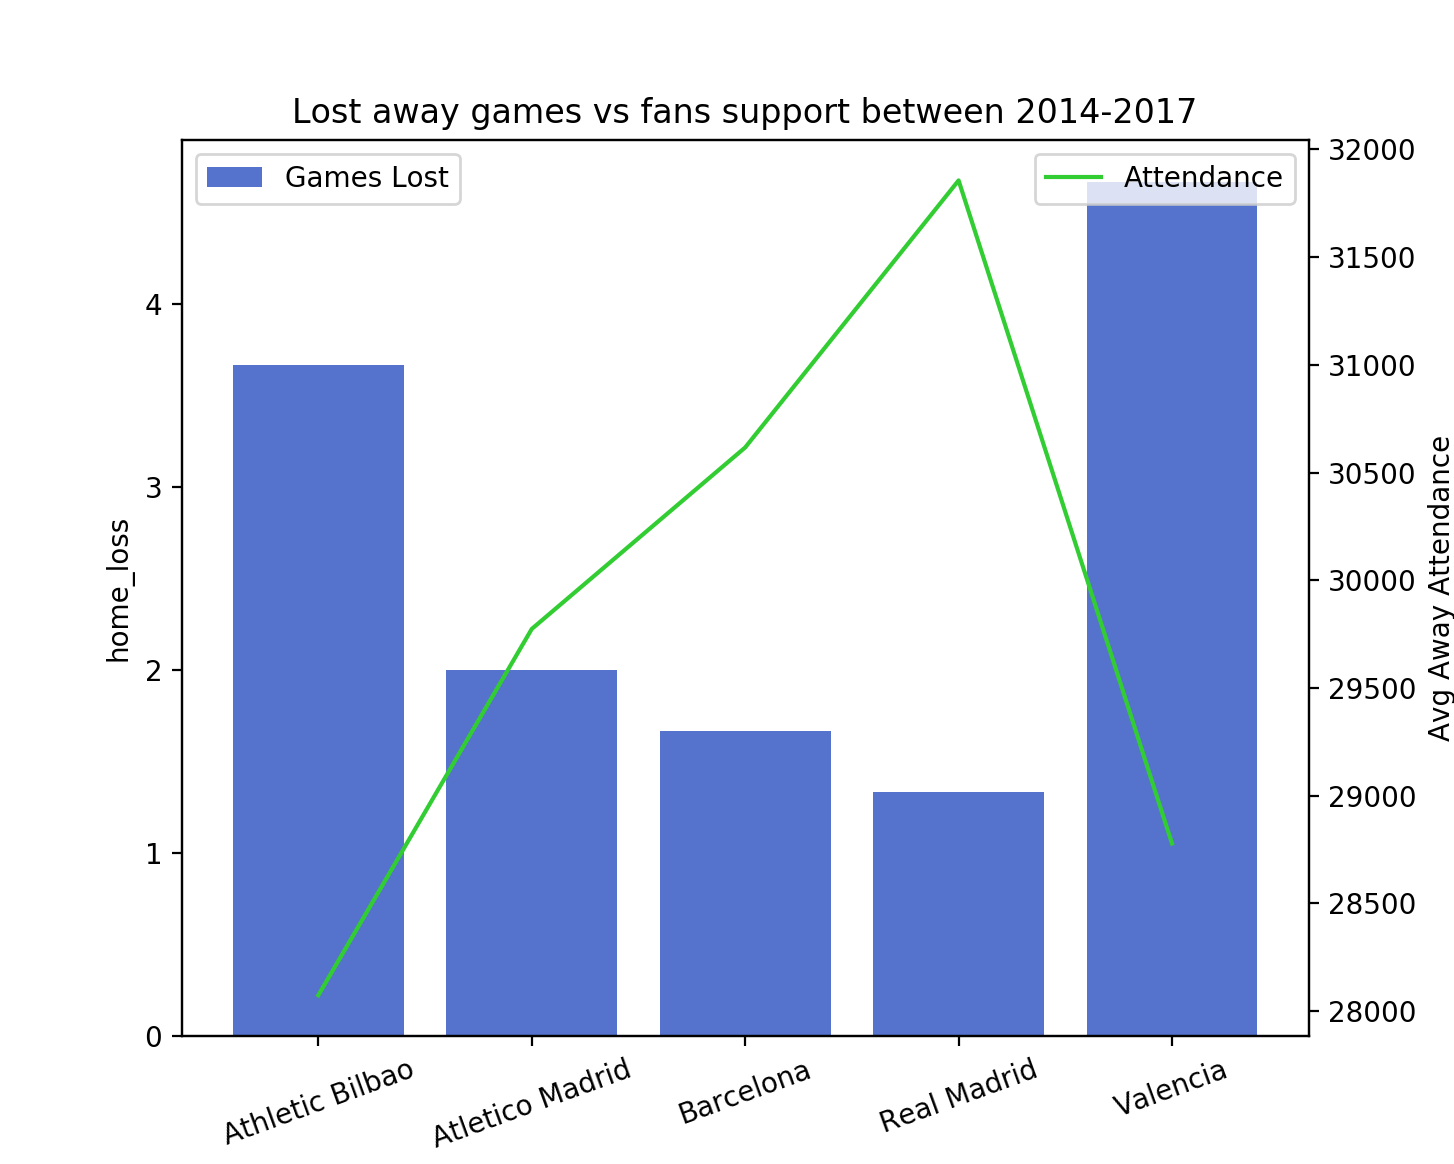

In [122]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
chart = sns.barplot(prueba.index,prueba['home_loss'],palette = ['royalblue'],label = 'Games Lost');
plt.title('Lost away games vs fans support between 2014-2017')
chart.set_xticklabels(prueba.index,rotation=20)
ax1.legend()
ax2 = ax1.twinx()
sns.lineplot(prueba.index,prueba['Avg Away Attendance'],color = 'limegreen',label = 'Attendance');


<IPython.core.display.Javascript object>


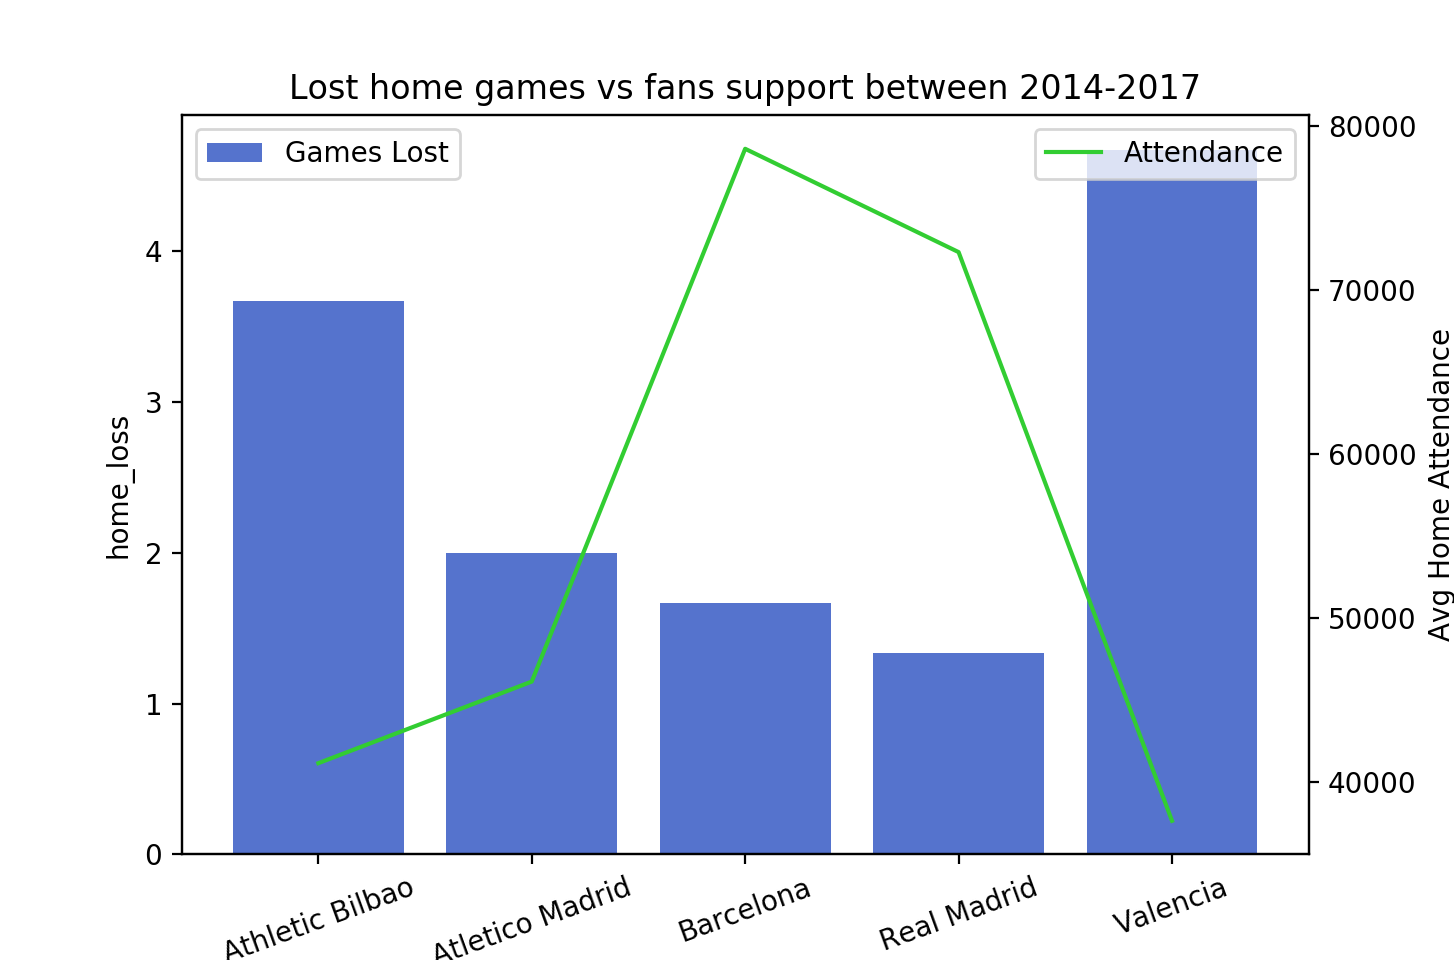

In [121]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
chart = sns.barplot(prueba.index,prueba['home_loss'],palette = ['royalblue'],label = 'Games Lost');
plt.title('Lost home games vs fans support between 2014-2017')
chart.set_xticklabels(prueba.index,rotation=20)
ax1.legend()
ax2 = ax1.twinx()
sns.lineplot(prueba.index,prueba['Avg Home Attendance'],color = 'limegreen',label = 'Attendance');